In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Carregar o dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
column_names = [
    'Checking account status', 'Duration in months', 'Credit history',
    'Purpose', 'Credit amount', 'Savings account/bonds',
    'Employment since', 'Installment rate in percentage of disposable income',
    'Personal status and sex', 'Other debtors / guarantors',
    'Present residence since', 'Property', 'Age in years',
    'Other installment plans', 'Housing',
    'Number of existing credits at this bank', 'Job',
    'Number of people being liable to provide maintenance for', 'Telephone',
    'Foreign worker', 'Credit risk'
]
df = pd.read_csv(url, sep=' ', header=None, names=column_names)



In [3]:
# 1. Informações básicas do dataset
print("Informações do Dataset:")
df.info()
print("\nPrimeiras 10 linhas do Dataset:")
print(df.head())
print("\nEstatísticas descritivas:")
print(df.describe())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Checking account status                                   1000 non-null   object
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Employment since                                          1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Perso

In [4]:
# buscando se existe valores vazios ou valores com o  formato errado
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Checking account status                                   1000 non-null   object
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Employment since                                          1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [7]:
 #Converter a coluna 'Credit risk' para o tipo object
df['Credit risk'] = df['Credit risk'].astype('object')
print("Tipo de dado da coluna 'Credit risk' após conversão:")
print(df['Credit risk'].dtype)

Tipo de dado da coluna 'Credit risk' após conversão:
object


In [8]:
from sklearn.preprocessing import LabelEncoder

# Separar as colunas categóricas (exceto 'Credit risk')
colunas_categoricas = df.select_dtypes(include=['object']).drop('Credit risk', axis=1).columns

# Criar um dicionário para armazenar os codificadores
codificadores = {}

# Aplicar o LabelEncoder para cada coluna categórica
for coluna in colunas_categoricas:
    codificador = LabelEncoder()
    df[coluna] = codificador.fit_transform(df[coluna].fillna('missing'))
    codificadores[coluna] = codificador

# Validar as transformações
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Checking account status                                   1000 non-null   int64 
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   int64 
 3   Purpose                                                   1000 non-null   int64 
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   int64 
 6   Employment since                                          1000 non-null   int64 
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Para escalonamento

# Seleciona as features (exceto 'Credit risk')
X = df.drop(['Credit risk'], axis=1)

# Define a variável alvo
y = df['Credit risk']

# Divide os dados em treino e teste, garantindo a estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Escalona os dados (opcional, dependendo do algoritmo)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

modelo_arvore = RandomForestClassifier() # modelo arvore de decisao
modelo_knn = KNeighborsClassifier() # modelo do KNN (nearest neighbors - vizinhos mais proximos)
modelo_naive_bayes = GaussianNB() # modelo naive bayes


In [12]:
# treinando os modelos
# Convertendo y_train para tipo numérico (int ou float)
y_train = y_train.astype(int)
modelo_arvore.fit(X_train, y_train)
modelo_knn.fit(X_train, y_train)
modelo_naive_bayes.fit(X_train, y_train)

GaussianNB()

Acurácia da Árvore de Decisão: 0.76
Acurácia do KNN: 0.7266666666666667
Acurácia do Naive Bayes: 0.74
Matriz de Confusão da Árvore de Decisão:
 [[193  17]
 [ 55  35]]
Matriz de Confusão do KNN:
 [[190  20]
 [ 62  28]]
Matriz de Confusão do Naive Bayes:
 [[159  51]
 [ 27  63]]
Relatório de Classificação da Árvore de Decisão:
               precision    recall  f1-score   support

           1       0.78      0.92      0.84       210
           2       0.67      0.39      0.49        90

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.67       300
weighted avg       0.75      0.76      0.74       300

Relatório de Classificação do KNN:
               precision    recall  f1-score   support

           1       0.75      0.90      0.82       210
           2       0.58      0.31      0.41        90

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.70      0.73     

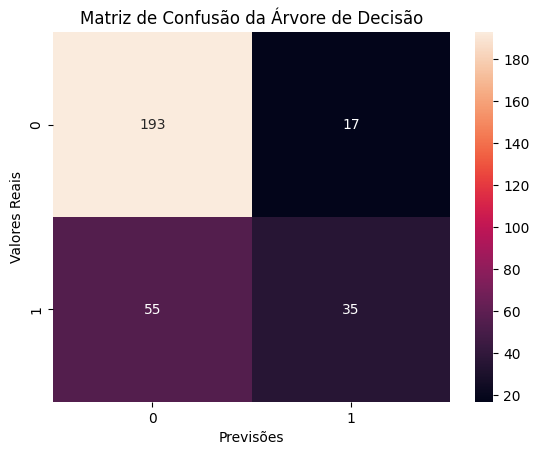

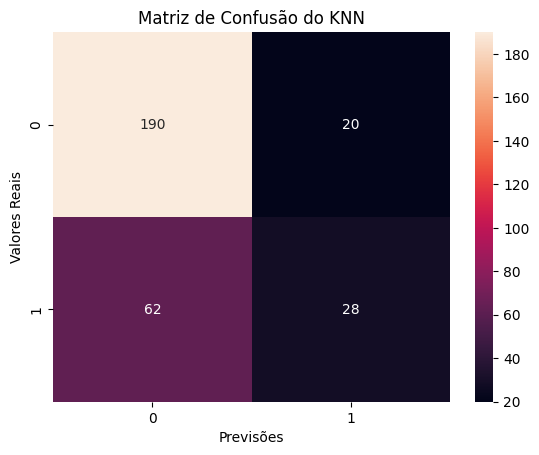

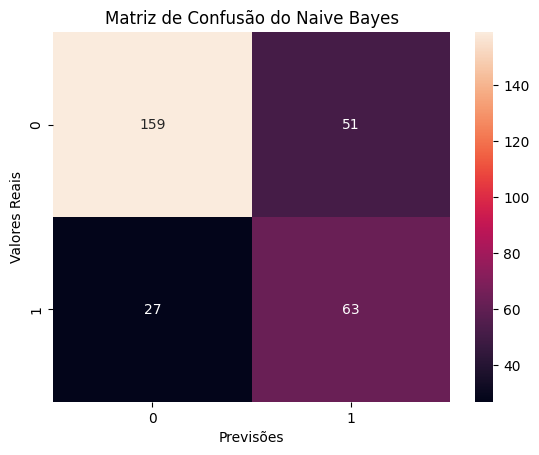

In [14]:
# treinando os modelos
# Convertendo y_train para tipo numérico (int ou float)
y_train = y_train.astype(int)
modelo_arvore.fit(X_train, y_train)
modelo_knn.fit(X_train, y_train)
modelo_naive_bayes.fit(X_train, y_train)

# Convertendo y_test para o mesmo tipo de dado de y_train (int)
y_test = y_test.astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Fazendo previsões
y_pred_arvore = modelo_arvore.predict(X_test)
y_pred_knn = modelo_knn.predict(X_test)
y_pred_naive_bayes = modelo_naive_bayes.predict(X_test)

# Calculando a acurácia
accuracy_arvore = accuracy_score(y_test, y_pred_arvore)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

print("Acurácia da Árvore de Decisão:", accuracy_arvore)
print("Acurácia do KNN:", accuracy_knn)
print("Acurácia do Naive Bayes:", accuracy_naive_bayes)

# Calculando a matriz de confusão
confusion_matrix_arvore = confusion_matrix(y_test, y_pred_arvore)
print("Matriz de Confusão da Árvore de Decisão:\n", confusion_matrix_arvore)

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusão do KNN:\n", confusion_matrix_knn)

confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
print("Matriz de Confusão do Naive Bayes:\n", confusion_matrix_naive_bayes)

# Calculando o relatório de classificação
classification_report_arvore = classification_report(y_test, y_pred_arvore)
print("Relatório de Classificação da Árvore de Decisão:\n", classification_report_arvore)

classification_report_knn = classification_report(y_test, y_pred_knn)
print("Relatório de Classificação do KNN:\n", classification_report_knn)

classification_report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print("Relatório de Classificação do Naive Bayes:\n", classification_report_naive_bayes)

# Visualizando a matriz de confusão
sns.heatmap(confusion_matrix_arvore, annot=True, fmt='d')
plt.title('Matriz de Confusão da Árvore de Decisão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

sns.heatmap(confusion_matrix_knn, annot=True, fmt='d')
plt.title('Matriz de Confusão do KNN')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

sns.heatmap(confusion_matrix_naive_bayes, annot=True, fmt='d')
plt.title('Matriz de Confusão do Naive Bayes')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()